### **Multi-Class Classification**

세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)

꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이라는 4개의 특성(feature)로부터

setosa, versicolor, virginica라는 3개의 붓꽃 품종 중 어떤 품종인지를 예측하는 문제

위와 같은 예시가 전형적인 다중 클래스 분류 문제라고 할 수 있음

### **Logistic Regression 복습**

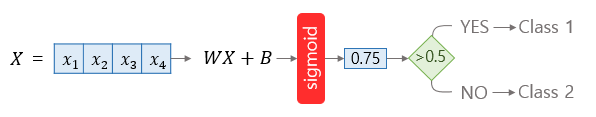

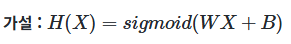

Sigmoid 함수가 예측값을 0 ~ 1 사이로 만듦

이를 통해 확률을 계산해서 이진 클래스 분류함

그래서 각 클래스의 확률을 더했을 때 1이 나옴

---
### **Softmax Regression**

Softmax Regression은 확률의 총 합이 1이 되는 아이디어를 다중 클래스 분류에 적용함

Softmax Regression은 각 선택지마다 소수 확률을 할당함(즉 각 선택지가 정답일 확률로 표현됨됨)

이때 총 확률의 합이 1이 되어야 함



결론은 Softmax Regression은 선택지의 개수만큼의 차원을 가지는 벡터를 만들고

해당 벡터가 모든 원소의 합이 1이 되도록 원소값들을 변환시키는 함수를 지나게 만들어야 함

이 함수를 Softmax 함수라고 함

---
### **Softmax Function**

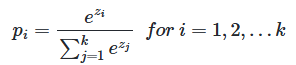

k차원의 벡터에서 i번째 원소를 Zi, i번째 클래스가 정답일 확률을 Pi로 나타냈을 때

Softmax Function은 다음과 같이 정의함

이를 위 붓꽃 예시에 적용해보도록 함

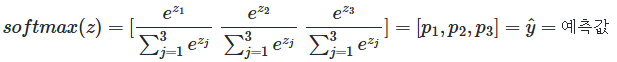

붓꽃 문제같은 경우에는 k=3 이므로

3차원 벡터인 z = [z1, z2, z3]의 입력을 받으면 위와 같이 리턴함

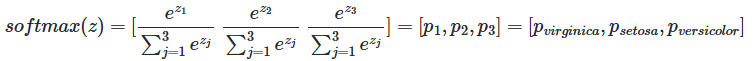

virginica, setosa, versicolor가 각각 i가 1일 때, 2일 때, 3일 때라고 하면

위와 같이 문제를 적용할 수 있음

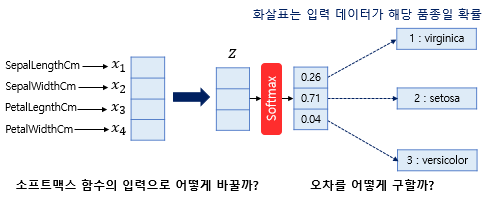

그림을 통해 더 깊이 이해함

위 그림에는 두 가지 질문이 있음

1. Sample 데이터는 4개의 독립 변수 x인데 Softmax Funcion은 k=3이므로 3차원 벡터를 받음

Softmax Function에 어떻게 입력해야 할까?

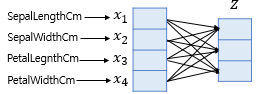

위와 같이 Softmax Function의 입력 벡터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행함

위 그림에서는 화살표가 총 4 x 3 = 12개이며 전부 다 다른 가중치를 가짐

학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경됨

2. 오차를 어떻게 구할까?

Softmax Function의 출력은 클래스의 개수만큼 차원을 가지는 벡터로, 0 ~ 1 사이 값을 가짐

이는 각각의 클래스가 정답일 확률을 나타냄

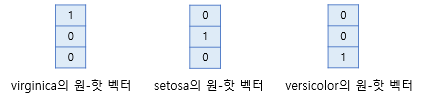

위 그림은 각각 출력 벡터의 첫번째 원소가 virginica가 정답일 확률, 두번째 원소가 setosa가 정답일 확률, 세번째 원소가 versicolor가 정답일 확률을

의미한다고 했을 때, 각 실제값의 정수 인코딩은 1, 2, 3이 되고 이에 One-Hot Encoding을 수행하여 실제값을 One-Hot Vector로 수치화한 것을 보여줌

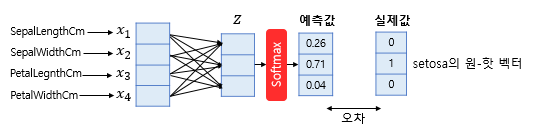

예를 들어 현재 풀고 있는 샘플 데이터의 실제값이 setosa라면 setosa의 One-Hot Vector는 [0, 1, 0]임

이 경우 예측값과 실제값의 오차가 0이 되는 경우는 Softmax Function의 결과가 [0, 1, 0]이 되는 것임

두 벡터의 오차를 계산하기 위해 비용함수로 Cross-Entropy 함수를 사용함

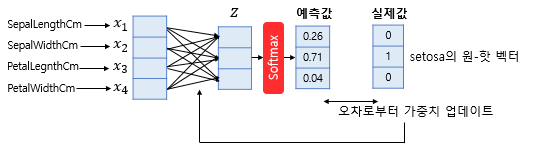

앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트함

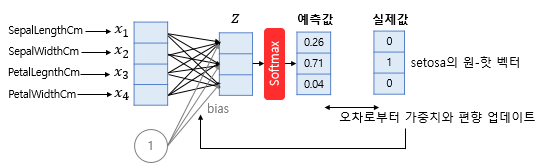

더 정확히는 앞서 배운 두 회귀와 마찬가지로 편향 또한 업데이트의 대상이 됨

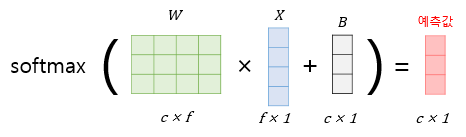

SoftMax Regression에서 예측값을 구하는 과정을 벡터와 행렬의 연산으로 표현하면 위와 같음

f는 특성의 수, c는 클래스의 수를 뜻함

---
### **붓꽃 품종 분류하기 행렬 연산으로 이해하기**

위 예제의 데이터는 전체 샘플 개수가 5개, 특성 개수가 4개이므로 5 x 4 행렬 X로 정의함

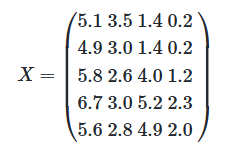

원래의 데이터는 위와 같지만

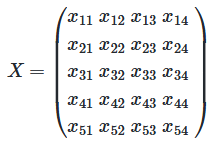

편의상 아래와 같이 표현함

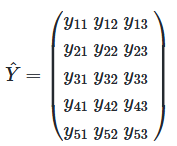

선택지가 3개인 문제이므로 행렬 Y의 열의 개수는 3개여야 함

각 행은 X의 각 행의 예측값이므로 행의 크기는 동일해야 함

따라서 행렬 Y의 크기는 5 x 3 임

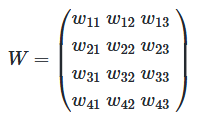

크기가 5 x 3인 Y는 5 x 4 크기인 X와 가중치 행렬 W의 곱으로 얻어지는 행렬이므로

가중치 행렬 W의 크기는 4 x 3 임

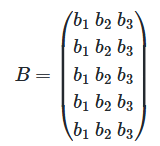

편향 행렬 B는 예측값 행렬 Y와 크기가 동일해야 하므로 5 x 3의 크기임

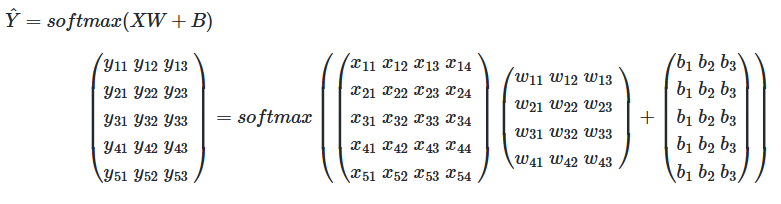

따라서 가설식은 다음과 같음

---
### **Cost Function**

Softmax Function에서는 Cost Function으로 크로스 엔트로피 함수를 사용함

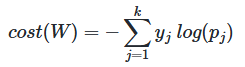

y는 실제값을 나타내며 k는 클래스의 개수로 정의함

yj는 실제값 One-Hot Vetcor의 j번째 인덱스를 의미함

pj는 샘플 데이터가 j번째 클래스일 확률을 나타냄

이 함수가 왜 적합하냐면

c가 실제값 One-Hot Vector에서 1을 가진 원소의 인덱스라고 한다면

Pc = 1은 예측값을 정확하게 예측한 경우가 됨

식에 대입해보면 -1log(1) = 0 이 되기 때문에

결과적으로 크로스 엔트로피 함수의 값은 0이 됨

즉 위 함수값을 최소화하는 방향으로 학습해야 함

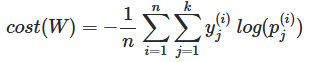

n개의 전체 데이터에 대한 평균을 구한다고 한다면 최종 비용 함수는 위와 같음

로지스틱 회귀에서 배운 크로스 엔트로피 함수와 본질적으로 같은 함수식임